# ipynb_snippets
> This notebook & webpage (depending on how you're access it) contains a quick reference for python code to do various things. See the legend on the right to jump to a section.
- skip_exec: true

# Some brief notes:

- [Hamel's blog for inspiration](https://hamel.dev/notes/linux/bash_scripting.html)
- some person's homepage https://www.mm218.dev/

<b> Todo dump: </b>

- pd.set_option('display.float_format', lambda x: '%.3f' % x)

Oke this is a bunch of test text

In [ ]:
# Update the req. file for docker
!pip freeze > /home/jovyan/proj/docker/jupyter-base-ds/requirements.txt
!git config --global user.email "" 
!git config --global user.name  "Menno Witteveen"
!git -C /home/jovyan/proj/docker/jupyter-compbio-ds/ add requirements.txt
# !git -C /home/jovyan/proj/docker/jupyter-base-ds/ status
!git -C /home/jovyan/proj/docker/jupyter-compbio-ds/ commit -m "update req.txt with line_profiler"

In [ ]:
# 'ff'

# Imports

In [ ]:
%config Completer.use_jedi = False
########################################################
## Base Imports:

# Sys Imports:
import time, sys, os

# Standard Imports:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats, linalg

#########################################################
## Experiment Specific Imports

# Logistics Imports:
import inspect, glob, re, contextlib, pickle, functools #,submitit #pyreadr
from tqdm.auto import tqdm
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
from mjwt.utils import jobinfo, corr, implot, sizegb, psrc, beep, Timer, Struct as mStruct

# ML Imports:
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split, ParameterGrid
from scipy.stats import pearsonr, spearmanr

# Genomics Imports:
import pysnptools as pst
from pysnptools.snpreader import Bed, Pheno, SnpHdf5, SnpData
from pysnptools.pstreader import PstData, PstHdf5, PstReader
from lambdapred.utils import load_bimfam

########################################################
## Configuration & Initialisation

# Display Configuration:
from IPython.display import set_matplotlib_formats, display #, HTML, Audio, Javascript
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('max_colwidth', 200) 
# pd.set_option('display.max_colwidth', None) # No pd trunkation (radical)
# display(HTML("<style>.container { width:75% !important; }</style>"))
# pd.reset_option('all')

# Initializations & Extensions:
timer = Timer(); toc = timer.toc; tic = timer.tic; tic(''); log=np.log10 #p.s. not easy to make it tic;time.sleep(2);toc
notebook = False  if '__file__' in locals() else True
with contextlib.suppress(Exception): os.environ["OMP_NUM_THREADS"] = str(int(os.environ['SLURM_JOB_CPUS_PER_NODE']) - 1)
with contextlib.suppress(BaseException): # non-essential import for`b development.
    get_ipython().run_line_magic('load_ext', 'line_profiler')

In [ ]:
# !pip install torch

In [ ]:
# tqdm

# Data Viz

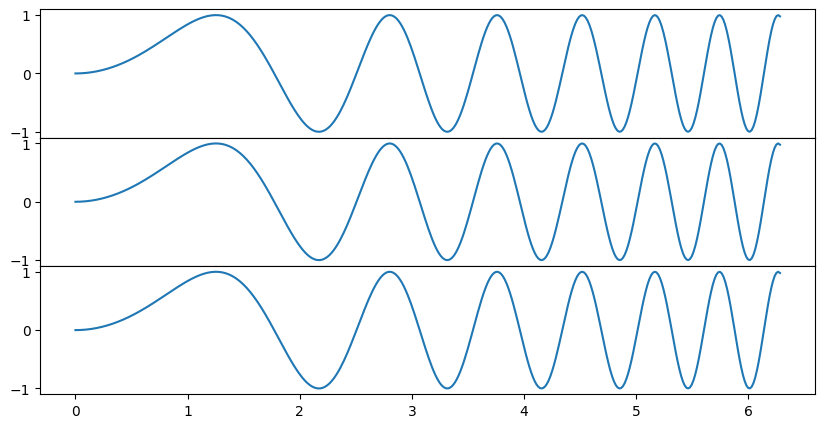

In [ ]:
import matplotlib.pyplot as plt
from pylab import *
import numpy as np

x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

subplots_adjust(hspace=0.000)
number_of_subplots=3

for i,v in enumerate(range(number_of_subplots)):
    v = v+1
    ax1 = subplot(number_of_subplots,1,v)
    ax1.plot(x,y)

plt.show()

/tmp/ipykernel_84492/1749909219.py:15: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  plt.xticks(sp.arange(len(df.columns)),df.columns,rotation=90)
/tmp/ipykernel_84492/1749909219.py:16: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  plt.yticks(sp.arange(len(df.columns)),df.columns,rotation=0)


<matplotlib.colorbar.Colorbar>

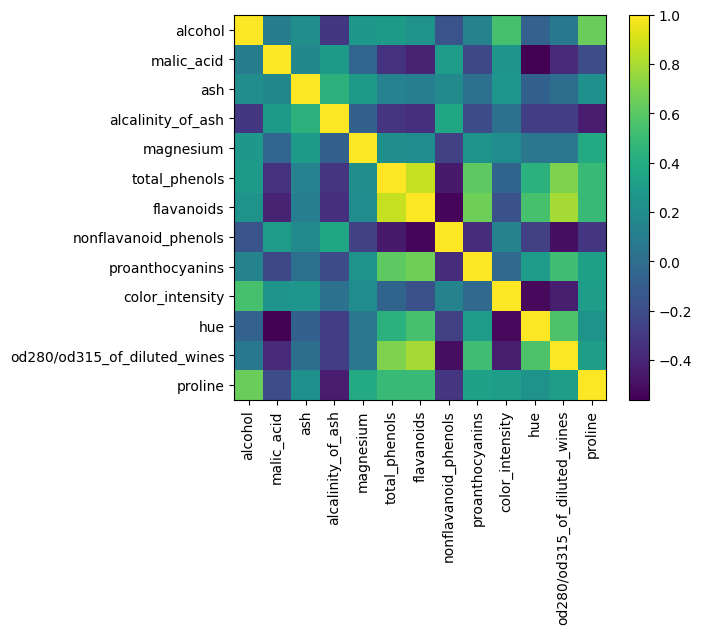

In [ ]:
## Approaches to load data (quickly):

# Some wine:
from sklearn.datasets import load_wine
wine_dt = load_wine()
wine_df = pd.DataFrame(wine_dt['data'],columns=wine_dt['feature_names'])
# display(wine_df.sample(3))
# Selecting wine as general df
df = wine_df

plt.figure(figsize=[6,5])
# Ce = sp.cov(df.values.T)
C = df.corr().values
plt.imshow(C,aspect='auto',interpolation='none')
plt.xticks(sp.arange(len(df.columns)),df.columns,rotation=90)
plt.yticks(sp.arange(len(df.columns)),df.columns,rotation=0)
plt.colorbar()

<Axes: >

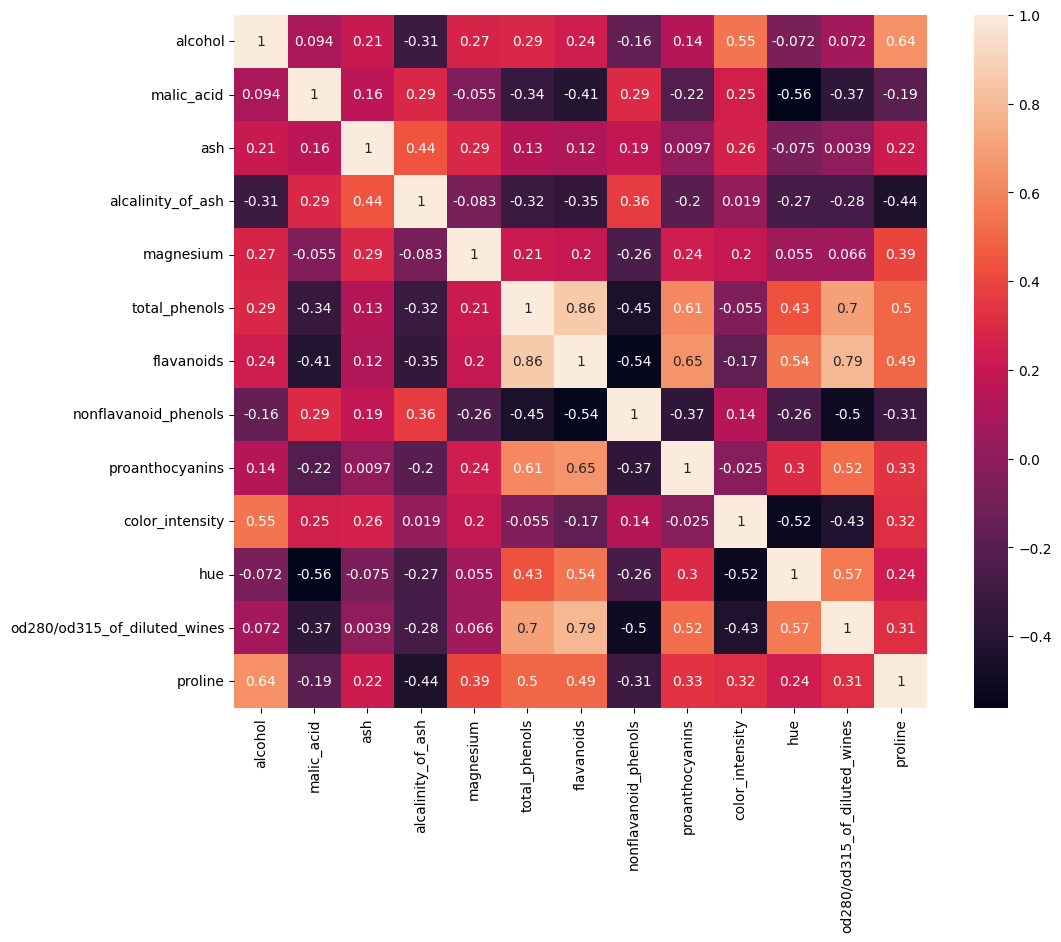

In [ ]:
# the plt.figure is unfortunately needed if one needs to spec. figsize
plt.figure(figsize=(12, 9)); sns.heatmap(df.corr(), square=True, annot=True) 

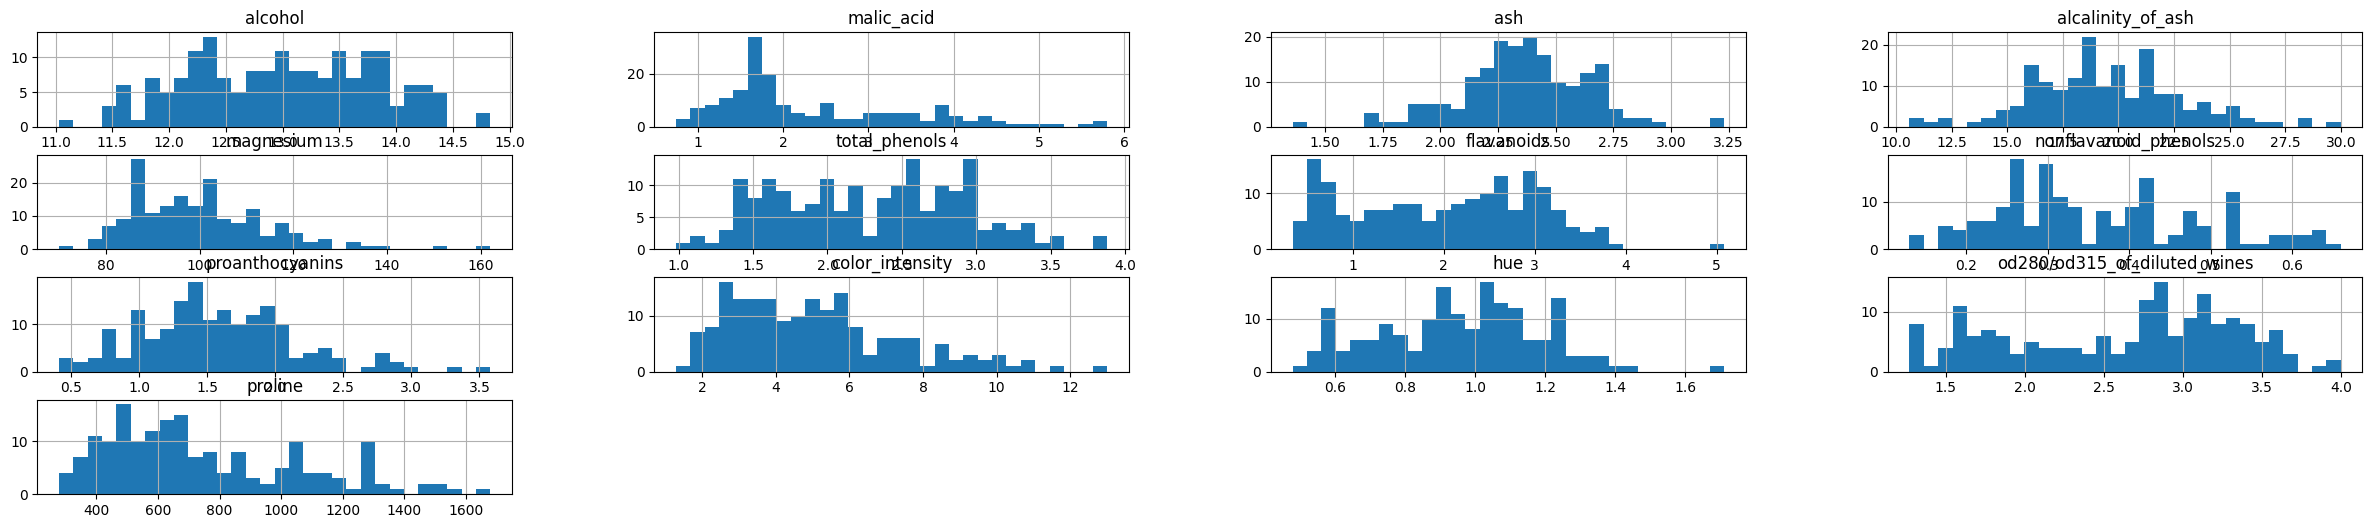

In [ ]:
df.hist(bins=30, figsize=(30,6));

## Matplotlib tricks

(0.0, 10.0, 25.0, 250.0)

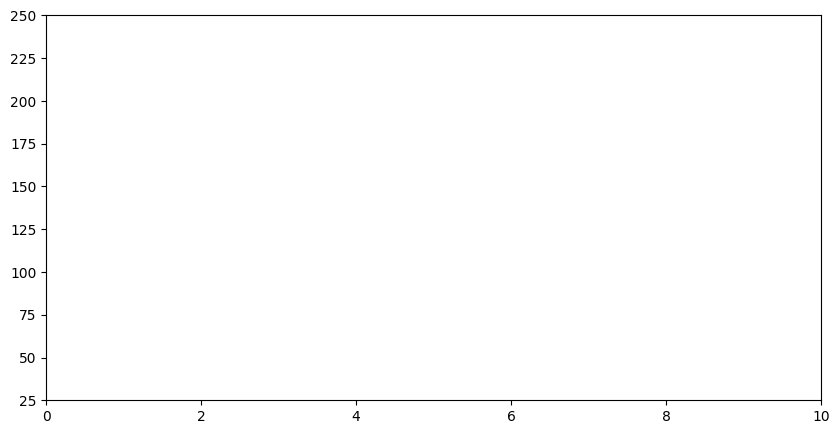

In [ ]:
# Use this to modifier your axis to your hearts contend:
plt.ylim(-2, 2)
plt.xlim(0,10)

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,25,250))


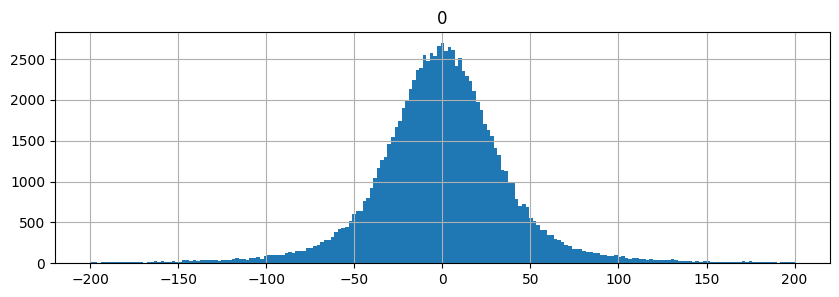

In [ ]:
## Hairy fat-tailed distribution?: Use a linspace to set the buckets of a histogram nicely:
n = 10**5; 
stds = np.sqrt(1/np.random.rand(n)*400);
ws = pd.DataFrame(np.random.randn(n)*stds) # Rather weird fat-tailed weight distribution:
ws.hist(bins=np.linspace(-200,200,200), figsize=[10,3]); # <-- without the bins argument this is a mess

## moar

In [ ]:
# Load coef_df
coef_df = pd.read_hdf('coef_df.h5','coef_df')

<Axes: xlabel='ga_totdays', ylabel='mat_age'>

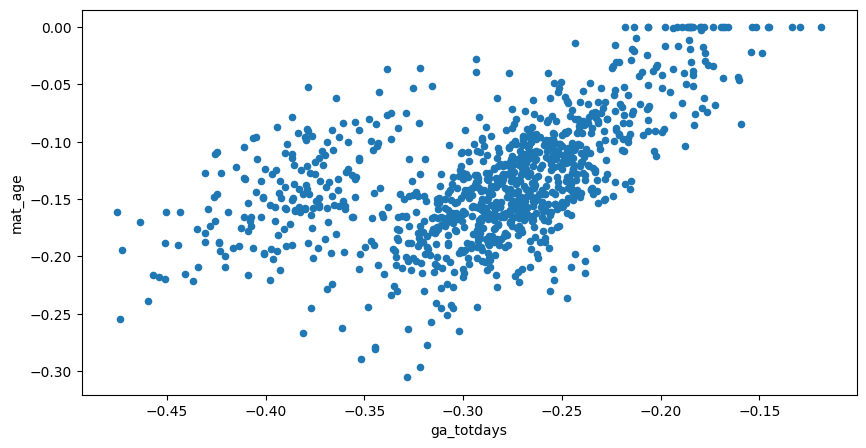

In [ ]:
coef_df.plot.scatter(x=0,y=1)

In [ ]:
# ?sns.pairplot

<Figure size 1000x500 with 0 Axes>

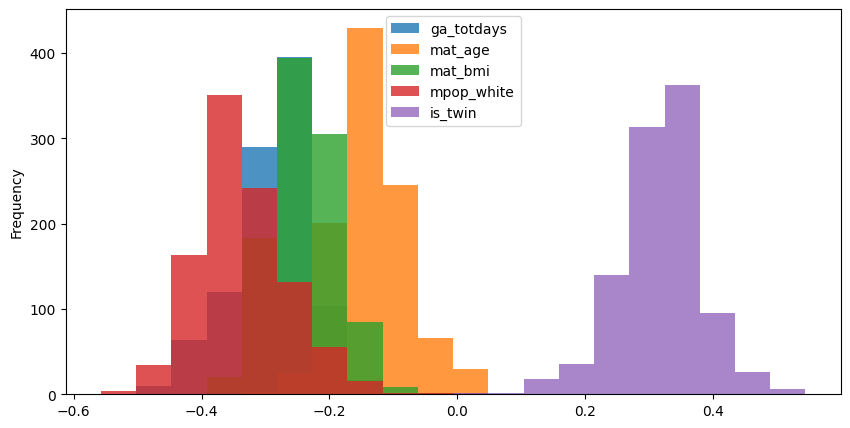

In [ ]:
plt.figure();
coef_df.plot.hist(alpha=0.8, bins=20); 
plt.show()

<seaborn.axisgrid.PairGrid>

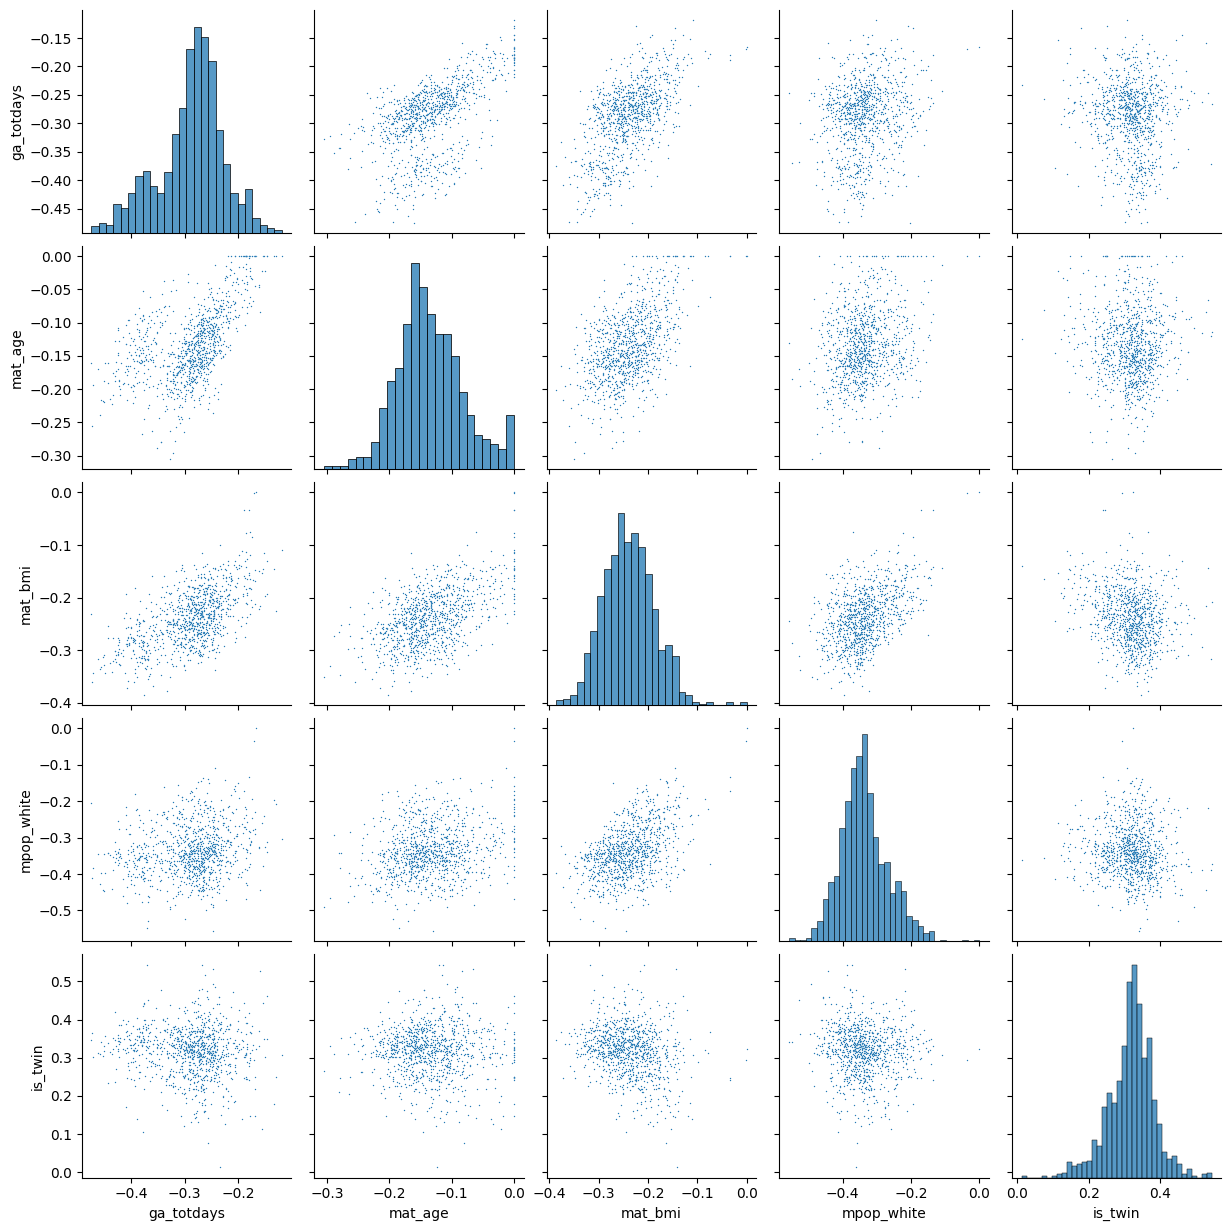

In [ ]:
# For scattermatrix plot stuff
sns.pairplot(coef_df, plot_kws={"s": 1.0})

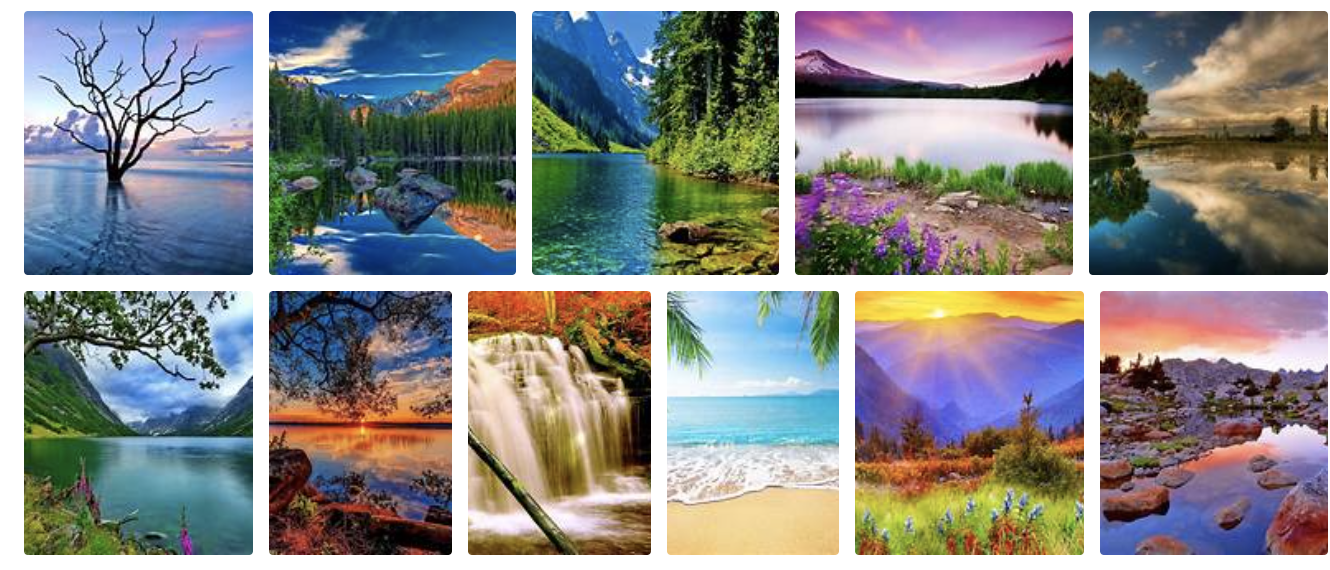

In [ ]:
coef_df

,ga_totdays,mat_age,mat_bmi,mpop_white,is_twin
0,-0.392195,-0.148588,-0.314482,-0.387349,0.317503
1,-0.386727,-0.189583,-0.313807,-0.400882,0.378390
2,-0.290056,-0.160036,-0.225576,-0.349331,0.240991
3,-0.238261,-0.084640,-0.230761,-0.321250,0.225304
4,-0.252113,-0.056818,-0.176889,-0.270960,0.355325
...,...,...,...,...,...
995,-0.356478,-0.129357,-0.299575,-0.343666,0.278307
996,-0.272725,-0.133474,-0.177013,-0.276120,0.290608
997,-0.245847,-0.077554,-0.235886,-0.437620,0.246134
998,-0.281898,-0.164914,-0.212031,-0.351553,0.304425


In [ ]:
coef_df.plot.scatter(x=0,y=1)

# ML Recipes

## Pytorch 101

In [ ]:
#  -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 505.64410400390625
199 337.98028564453125
299 226.92686462402344
399 153.361083984375
499 104.6224136352539
599 72.3280029296875
699 50.92662048339844
799 36.74208450317383
899 27.339014053344727
999 21.10478401184082
1099 16.970691680908203
1199 14.228747367858887
1299 12.409767150878906
1399 11.202799797058105
1499 10.401751518249512
1599 9.87000560760498
1699 9.516922950744629
1799 9.282390594482422
1899 9.126569747924805
1999 9.023015975952148
Result: y = 0.004640887025743723 + 0.8434610962867737 x + -0.0008006299030967057 x^2 + -0.09144145995378494 x^3


# Schedulers
    


## Slurm & Submitit Tricks

In [ ]:
for i, job in job_dt.items():
    job.cancel()
    

In [ ]:
# Cancel ALL submitit jobs!:
from io import StringIO
string =  !que
stringio = StringIO('\n'.join(string))
que_df = pd.read_table(stringio, delim_whitespace=True); que_df

for _, jobid in que_df.JOBID[que_df.NAME == 'submitit'].iteritems():
    jerg
    !scancel {jobid}

In [ ]:
string = """60080867, 60080868, 60080869, 60080870, 60080871, 60080872, """
log_folder = "/home/mennow/dsmwpred/mennow/log_test/%j"
eval_job_dt = dict()
for i, job_id in enumerate(string.split(', ')):
    if job_id != '': eval_job_dt[i] = submitit.SlurmJob(job_id=job_id, folder=log_folder) 

In [ ]:
string='''{0: SlurmJob<job_id=55037710, task_id=0, state="COMPLETED">,
 1: SlurmJob<job_id=55037711, task_id=0, state="COMPLETED">,
 2: SlurmJob<job_id=55037712, task_id=0, state="RUNNING">,
 3: SlurmJob<job_id=55037713, task_id=0, state="RUNNING">,
 4: SlurmJob<job_id=55037714, task_id=0, state="COMPLETED">,
 5: SlurmJob<job_id=55037715, task_id=0, state="COMPLETED">,
 6: SlurmJob<job_id=55037716, task_id=0, state="RUNNING">,
 7: SlurmJob<job_id=55037717, task_id=0, state="RUNNING">,
 8: SlurmJob<job_id=55037718, task_id=0, state="COMPLETED">,
 9: SlurmJob<job_id=55037719, task_id=0, state="COMPLETED">,
 10: SlurmJob<job_id=55037720, task_id=0, state="COMPLETED">,
 11: SlurmJob<job_id=55037721, task_id=0, state="RUNNING">,
 12: SlurmJob<job_id=55037722, task_id=0, state="RUNNING">,
 13: SlurmJob<job_id=55037723, task_id=0, state="RUNNING">,
 14: SlurmJob<job_id=55037724, task_id=0, state="RUNNING">,
 15: SlurmJob<job_id=55037725, task_id=0, state="RUNNING">}'''

folder = "/home/mennow/dsmwpred/mennow/log_test/%j"
job_dt = dict()
for i, elem in enumerate(string.split('\n')):
    start = 'job_id='
    stop = ', task_id='
    job_id = elem[elem.find(start)+len(start):elem.find(stop)]
    job_dt[i] = submitit.SlurmJob(job_id=job_id, folder=folder)

In [ ]:
# Clean out everything older then 9 days modded. Careful with this!
!find ./log_test/* -type d -ctime +9 -exec rm -rf {} \;

In [ ]:
string = !squeue -t pd
# string = !squeue -t r # For RUNNING ones.
string = '\n'.join(string)
from io import StringIO
df = pd.read_csv(StringIO(string), delim_whitespace=True)
df.groupby('USER').count().sort_values(by='JOBID').iloc[::-1]

# If you really want all: this cell is a little buggy...
string = !squeue -u mennow
string = '\n'.join(string)--format="%all"
from io import StringIO
df = pd.read_csv(StringIO(string), delim_whitespace=True)

# Seeing some prints:
[print(f'---> i={i} <---\n', job_dt[i].stdout()[-100:]) for i in np.sort(np.random.randint(0,len(job_dt), 4)) if job_dt[i].stdout() is not None]

# See a unique count of all the Slurm states:
df = pd.DataFrame([elem.state for elem in eval_job_dt.values()])
df[1] = 1.
df.groupby(0).count()

In [ ]:
# Resubmission of Jobs:
resub_lst = []
for key, job in eval_job_dt.items():x
    if job.state == 'FAILED':
        new_job = executor.submit(job.submission().function)
        eval_job_dt[key] = new_job
        resub_lst.append(key)
        print(key, job)
print('DONE')

In [ ]:
# Unpack job subs:
# Get those configs back:
job.submission().function.__globals__['cfg_dt']

# It seems that the source can actually get lost
inspect.getsource(job.submission().function) # DOES NOT WORK after some time.


In [ ]:
1

1

# Development

## Tricks

In [ ]:
# Run this line if you want to get some help infos:
??implot

## Decoration

In [ ]:
# Methods that overwrite the getting and setting syntax
class C(object):
    def __init__(self):
        self._x = None
        self.data = 42

    @property
    def x(self):
        """I'm the 'x' property."""
        print("getter of x called")
        return self._x

    @x.setter
    def x(self, value):
        print("setter of x called")
        self._x = value

    @x.deleter
    def x(self):
        print("deleter of x called")
        del self._x
        

c = C()
c.x = 'foo'  # setter called
foo = c.x    # getter called
del c.x      # deleter called

setter of x called
getter of x called
deleter of x called


# Appendix

In [ ]:
#!/usr/bin/env python

"""
LinkageData
durr tst
"""
import scipy as sp
import numpy as np
import pandas as pd
from scipy import linalg
from sys import getsizeof

import warnings, importlib, json, os, glob
from collections import OrderedDict, deque, defaultdict
from pysnptools.standardizer import Unit, UnitTrained
import pysnptools as pst
# import pysnptools.util as pstutil
# from pysnptools.standardizer import UnitTrained
# from dataclasses import dataclass

class SqrtNinv(Unit):
    def __init__(self):
        super(SqrtNinv, self).__init__()

class BaseLinkageData():

    def __init__(self, *, sst_df=None, regdef_df=None, master_dt=None, #There should be sst_df or master_dt
                 srd=None, sda_standardizer=Unit,
                 prd=None, pda_standardizer=Unit,
                 lrd=None, lda_standardizer=None,
                 grd=None, gda_standardizer=False,
                 
                 shift=0, cm=None, _setzero=True, ddof=0, #ddof should remain 0 for now
                 
                 clear_xda=True, # Refactor with _clear?
                 clear_linkage=False,
                 compute_sumstats=False,
                 calc_allelefreq=False,
                 intersect_apply=True,
                 
                 _onthefly_retrieval=True, # These underscore options are the advanced developer options
                 _save_vars = ['L','D','R','sst_df'],
                 _clear_vars = ['L','D','R'],
                 _cross_chrom_ld = False,
                 _save_s2sst = True,
                 
                 gb_size_limit=10., dtype='float32', verbose=False):
        
        if True:
            # bim and fam df have to be supplied because pysnptools halvely
            # implemented these portions of the genetic data into their object
            # meaning that srd cannot be relied uppon
            excl_lst = ['self','kwg_dt','excl_lst']
            kwg_dt = {key: item for key, item in locals().items() if not (key in excl_lst)}
            for key, item in locals().items():
                if not (key in excl_lst): 
                    self.__setattr__(key, item)
            # New rule: blx have to be created from the inside
            # Perhaps later it can be made into a special load instead of a compute

            # first-checks & inits:
            if cm is not None: assert cm > 0
            if lrd is not None: raise NotImplementedError('lrd not possible atm.')
            if grd is not None:
                assert gda_standardizer or (gda_standardizer is None)
            assert type(compute_sumstats) is bool
            if ddof != 0: raise NotImplementedError('delta deg. of freedom have to 0 for this version')
            self.reg_dt = dict()
            self.cur_total_size_in_gb = 0.0
            self.xda_q = deque()
            [self.xda_q.append((-1,'')) for _ in range(5)]  # put 5x -1 in queue
            self.reloaded_xda_cnt = 0
            self._fn_lst = []

            # Checks            
            if srd is not None:
                assert type(sst_df) is pd.DataFrame
                self._check_xrd()
                assert isinstance(sst_df, pd.DataFrame)
                assert isinstance(regdef_df, pd.DataFrame)
                self.init_regions()
            elif master_dt is not None:
                # Fill attributes in case master_dt is present:
                for key, item in master_dt.items():
                    setattr(self, key, item)
                reg_dt=dict()
                for pre_i, geno_dt in self.reg_dt.items(): reg_dt[int(pre_i)] = geno_dt
                self.reg_dt = reg_dt # An ugly type conversion hack cause json does not allow i to be integer, but forces it to be a string.
            else:
                raise Exception('Essentials not present')

    def _check_xrd(self):

        if self.srd is not None:
            assert pst.snpreader.SnpReader in self.srd.__class__.__mro__

        if self.prd is not None:
            n_start = len(self.prd.iid)
            n_pheno = self.prd.shape[1]
            if n_pheno > 1: raise NotImplementedError(f'only one pheno in prd allowed {n_pheno} detected ({prd.col}), for now. remove other phenos')
            self.srd, self.prd = pst.util.intersect_apply([self.srd, self.prd])
            if len(self.prd.iid) != n_start:
                warnings.warn('Number of samples do not match up after internal intersection, samples were lost:' 
                              f'{n_start - len(self.prd.iid)}, start = {n_start}, after_intersection = {len(self.prd.iid)}')
                if not self.intersect_apply: raise Exception('Intersection was required, but may not performed. Hence raising this error.')

        if self.grd is not None:
            # Check alignment for now, auto alignment needs work cause iid stuffs:
            if self.srd is not None:
                if not np.all(self.grd.sid == self.srd.sid):
                    raise Exception('snps of grd and srd not matching up, align first,'
                                    ' auto align will be implemented later')
            else:
                raise NotImplementedError('Not sure what to do with grd if no srd is present. not implemented.')
        
    ###########################
    # Regions Administration:
    if True:

        def init_regions(self):
            do_beta_moving = ('beta_mrg' in self.sst_df.columns)
            if not do_beta_moving:
                warnings.warn('No \'beta_mrg\' column detected in sst_df! This means that no summary stats were detected.')
            else:
                assert 'n_eff' in self.sst_df.columns
            cur_chrom = None
            i = 0; n_snps_cumsum = 0
            sst_df_lst = []
            for reg_cnt, (_, row) in enumerate(self.regdef_df.iterrows()):
                # Move region into specialized dictionary
                regid = row['regid'];
                chrom = row['chrom']
                start = row['start'];
                stop  = row['stop']

                # Map Variants to region
                ind = self.sst_df.chrom == chrom
                ind = (self.sst_df['pos'] >= start) & ind
                ind = (self.sst_df['pos'] < stop) & ind
                sid = self.sst_df['snp'][ind].values
                indices = self.srd.sid_to_index(sid)  # if sid not strickly present this will give an error!
                n_snps_reg = len(indices)
                if n_snps_reg == 0:
                    continue
                else:
                    geno_dt = dict(regid=regid,
                                   chrom=chrom,
                                   start=start,
                                   stop=stop,
                                   start_j=n_snps_cumsum)
                    n_snps_cumsum += n_snps_reg
                    geno_dt['stop_j'] = n_snps_cumsum
                    sst_df = self.sst_df[ind].copy(); sst_df['i'] = i
                    geno_dt['sst_df'] = sst_df
                    assert geno_dt['start_j'] == sst_df.index[0]; sst_df_lst.append(sst_df)
                    assert geno_dt['stop_j']  == sst_df.index[-1] + 1
                    if do_beta_moving:
                        geno_dt['beta_mrg'] = geno_dt['sst_df']['beta_mrg'].copy().values[:, np.newaxis]
                        assert len(geno_dt['beta_mrg'].shape) == 2
                    if self.srd is not None:
                        geno_dt['srd'] = self.srd[:, indices]
                        geno_dt['stansda'] = self.sda_standardizer() if self.sda_standardizer is not None else None
                    else:
                        raise NotImplementedError()
                    if self.grd is not None:
                        geno_dt['grd'] = self.grd[:, indices]
                        geno_dt['stangda'] = self.gda_standardizer() if self.gda_standardizer is not None else None
                    # Count up if things are actually stored in reg_dt
                    self.reg_dt[i] = geno_dt
                    i += 1
            self.n_snps_total = n_snps_cumsum
            sst_df = pd.concat(sst_df_lst, axis=0)
            self.sst_df = sst_df

        def get_i_list(self):
            return list(self.reg_dt.keys())

        def _load_all_snpdata(self):
            # load all regions
            for i, geno_dt in self.reg_dt.items():
                sda = geno_dt['srd'].read(dtype=self.dtype)
                stansda = sda.train_standardizer(apply_in_place=True,
                                                 standardizer=geno_dt['stansda'])
                geno_dt['sda'] = sda
                geno_dt['stansda'] = stansda

    ###########################
    ## Compute: ###############

    # Local Linkage Stuff: ####
    if True:
    
        def compute_linkage_sameregion(self, *, i):
            return self.compute_linkage_shiftregion(i=i, shift=0)

        def regions_compatible(self, *, i, j):
            try:
                if self.reg_dt[i]['chrom'] == self.reg_dt[j]['chrom']:
                    res = True
                elif self._cross_chrom_ld:
                    res = True
                else:
                    res = False
            except Exception as e:
                if (not (i in self.reg_dt.keys())) or (not (j in self.reg_dt.keys())):
                    res = False
                else:
                    raise e
            return res

        def compute_linkage_shiftregion(self, *, i, shift):
            j = i + shift
            if self.regions_compatible(i=i, j=j):
                self_sda = self.get_sda(i=i)
                dist_sda = self.get_sda(i=j)
                n = len(self_sda.iid)
                S_shift = self_sda.val.T.dot(dist_sda.val) / (n - self.ddof)
                return S_shift
            else:
                self_sda = self.get_sda(i=i)
                return np.zeros((self_sda.val.shape[1], 0))

        def compute_linkage_cmfromregion(self, *, i, cm):
            geno_dt = self.reg_dt[i]; lst = []
            if cm < 0: # Doing left:
                stop_j   = geno_dt['start_j']
                cm_left  = geno_dt['sst_df'].loc[stop_j]['cm'] 
                slc_df = self.sst_df.loc[:stop_j-1]
                slc_df = slc_df[slc_df.chrom==geno_dt['chrom']]
                slc_df = slc_df[slc_df.cm > (cm_left + cm)]
                start_i = slc_df['i'].min()
                start_i = -7 if np.isnan(start_i) else start_i
                for cur_i in range(start_i, i):
                    lst.append(self.compute_linkage_shiftregion(i=i, shift=cur_i-i))
                    if start_i == -7: break
                L = np.concatenate(lst, axis=1)[:,-slc_df.shape[0]:] # concat & clip
                if self._setzero:
                    cms_reg    = geno_dt['sst_df']['cm'].values
                    cms_distal = slc_df['cm'].values
                    cms_L      =  cms_distal[np.newaxis,:] - cms_reg[:,np.newaxis]
                    setzero_L  = cms_L < cm
                    L[setzero_L] = 0
                    assert L.shape == setzero_L.shape
                return L
            else:
                start_j   = geno_dt['stop_j']
                cm_right  = geno_dt['sst_df'].loc[start_j-1]['cm']
                slc_df = self.sst_df.loc[start_j:]
                slc_df = slc_df[slc_df.chrom==geno_dt['chrom']]
                slc_df = slc_df[slc_df.cm < (cm_right + cm)]
                stop_i = slc_df['i'].max()
                stop_i = i+2 if np.isnan(stop_i) else stop_i + 1
                for cur_i in range(i+1, stop_i):
                    lst.append(self.compute_linkage_shiftregion(i=i, shift=cur_i-i))
                R = np.concatenate(lst, axis=1)[:,:slc_df.shape[0]] # concat & clip
                if self._setzero:
                    cms_reg    = geno_dt['sst_df']['cm'].values
                    cms_distal = slc_df['cm'].values
                    cms_R     =  cms_distal[np.newaxis,:] - cms_reg[:,np.newaxis]
                    setzero_R = cms_R > cm
                    R[setzero_R] = 0
                    assert R.shape == setzero_R.shape
                return R
        
    # Misc Stuff: #############
    if True:
    
        def compute_sumstats_region(self, *, i):
            geno_dt = self.reg_dt[i]
            sda = self.get_sda(i=i)
            X = sda.val
            y = self.get_pda().val
            n = len(y)
            c_reg = X.T.dot(y) / (n - self.ddof)
            return c_reg   

        def compute_allelefreq_region(self, *, i):
            # Speed might be improved by using dot prod here, instead of sums
            # np.unique was way slower (5x)
            geno_dt = self.reg_dt[i]
            n, p_blk = sda.val.shape
            sst_df = geno_dt['sst_df'].copy()
            cnt0   = np.sum(sda.val==0, axis=0)
            cnt1   = np.sum(sda.val==1, axis=0)
            cnt2   = np.sum(sda.val==2, axis=0)
            cntnan = np.sum(np.isnan(sda.val), axis=0)
            assert np.allclose(cnt0 + cnt1 + cnt2 + cntnan, n)
            sst_df['altcnt=0']   = cnt0
            sst_df['altcnt=1']   = cnt1
            sst_df['altcnt=2']   = cnt2
            sst_df['altcnt=nan'] = cntnan
            sst_df['altfreq']    = (cnt1 + cnt2)/(n - cntnan)
            sst_df['missfreq']   = 1 - cntnan/n
            return sst_df

        def compute_ldscores_region(self, *, i):
            sst_df = self.reg_dt[i]['sst_df'].copy()
            L = self.get_left_linkage_region(i=i)
            D = self.get_auto_linkage_region(i=i)
            R = self.get_right_linkage_region(i=i)
            for k, j in enumerate(sst_df.index):
                slds = np.sum(L[k]**2) + np.sum(D[k]**2) + np.sum(R[k]**2)
                sst_df.loc[j, 'lds'] = np.sqrt(slds)
            return sst_df
        
    ############################
    ## Retrieve: ###############
    
    # Local Linkage: ############
    if True:
    
        def retrieve_linkage_allregions(self):
            for i, geno_dt in self.reg_dt.items():
                self.retrieve_linkage_region(i=i)
            if self.verbose:   print('\nDone')
            if self.clear_xda: self.clear_all_xda()

        def retrieve_linkage_region(self, *, i):

            geno_dt = self.reg_dt[i]
            if 'store_dt' in geno_dt.keys():
                self.load_linkage_region(i=i)
            shift = self.shift; cm = self.cm
            compute_sumstats = self.compute_sumstats

            if 'L' in geno_dt.keys():
                if 'D' in geno_dt.keys():
                    if 'R' in geno_dt.keys():
                        return None  # everything is done now.

            if self.verbose: print(f'Computing LD for region #{i} on chr{geno_dt["chrom"]}', end='\r')
            # Refactor: if linkage is only in blocks this code will lead to recomputation...
            if (shift > 0):
                L_lst = []
                R_lst = []
                for cur_shift in range(1, shift + 1):
                    L_lst.append(self.compute_linkage_shiftregion(i=i, shift=-cur_shift))
                    R_lst.append(self.compute_linkage_shiftregion(i=i, shift=cur_shift))

                # Store Linkage in geno_dt
                geno_dt['L'] = np.concatenate(L_lst[::-1], axis=1)  # L stands for left
                geno_dt['D'] = self.compute_linkage_sameregion(i=i)  # Linkage within region, D is convention from LDpred 1
                geno_dt['R'] = np.concatenate(R_lst, axis=1)  # R stands for right

                # Indices needed for slicing and dicing matched variables (e.g. beta weights):
                geno_dt['start_j_L'] = geno_dt['start_j'] - geno_dt['L'].shape[1]
                geno_dt['stop_j_L'] = geno_dt['start_j']
                geno_dt['start_j_R'] = geno_dt['stop_j']
                geno_dt['stop_j_R'] = geno_dt['stop_j'] + geno_dt['R'].shape[1]

            elif (shift==0) and (cm is None):  # Only same region has to be done.
                geno_dt['D'] = self.compute_linkage_sameregion(i=i)

            elif (shift==0) and cm > 0:
                geno_dt['L'] = self.compute_linkage_cmfromregion(i=i, cm=-cm)
                geno_dt['D'] = self.compute_linkage_sameregion(i=i)
                geno_dt['R'] = self.compute_linkage_cmfromregion(i=i, cm=cm)

                # Indices needed for slicing and dicing matched variables (e.g. beta weights):
                geno_dt['start_j_L'] = geno_dt['start_j'] - geno_dt['L'].shape[1]
                geno_dt['stop_j_L'] = geno_dt['start_j']
                geno_dt['start_j_R'] = geno_dt['stop_j']
                geno_dt['stop_j_R'] = geno_dt['stop_j'] + geno_dt['R'].shape[1]

            if compute_sumstats:
                self.retrieve_sumstats_region(i=i)
              
        def load_linkage_allregions(self):
            for i, geno_dt in self.reg_dt.items():
                self.load_linkage_region(i=i)
            if self.verbose: print('\nDone')
            
        def load_linkage_region(self, *, i):
            geno_dt = self.reg_dt[i]
            store_dt = geno_dt['store_dt']
            for varname, file_dt in store_dt.items():
                module = importlib.import_module('.'.join(file_dt['typestr'].split('.')[:-1]))
                cname  = file_dt['typestr'].split('.')[-1]
                CurClass = getattr(module, cname) # Retrieves module.submodule.submodule.. etc
                curfullfn = os.path.join(self.curdn, file_dt['fn'])
                geno_dt[varname] = CurClass(pd.read_hdf(curfullfn, key=file_dt['key']))
                if self.verbose: print(f'loading: fn={curfullfn} key={file_dt["key"]}'+' '*50, end='\r')
                
        def save(self, fn, keyfmt='ld/chrom{chrom}/i{i}/{varname}', fmt='hdf5', mkdir=False, dn=None):
            self.curdn = os.path.dirname(fn) if (dn is None) else dn
            fn = os.path.basename(fn) if (dn is None) else fn
            if mkdir: os.makedirs(self.curdn, exist_ok=True)
            if (fmt != 'hdf5'): raise Exception(f'Only hdf5 file format supported atm, not {fmt}') 
            for i, geno_dt in self.reg_dt.items():
                self.save_linkage_region(i=i, fn=fn)
                
            # Saving of 'logistical' data for the object
            master_lst = [ 'shift', 'cm', '_setzero',
             'clear_xda', 'clear_linkage', 'compute_sumstats', 'calc_allelefreq', 
             '_onthefly_retrieval', '_save_vars', '_clear_vars', 
             'gb_size_limit', 'dtype', 'verbose', 'n_snps_total']
            geno_lst = ['regid','chrom','start','stop','start_j','stop_j',
                        'start_j_L', 'stop_j_L', 'start_j_R', 'stop_j_R','store_dt']
                
            def caster(arg, types):
                if np.isscalar(arg):
                    if isinstance(arg, np.integer): arg = int(arg)
                if type(arg) is int: return int(arg)
                assert type(arg) in types
                return arg

#             if hasattr(self,'s'): assert (self.s.shape == (self.n_snps_total,1))
            master_dt = dict(); maxlen = 20
            for key in master_lst:
                var = getattr(self, key)
                if type(var) is list:
                    for item in var:
                        assert type(item) in (bool, str, float, int, type(None))
                        if type(item) is str: assert (len(item) < maxlen)
                elif type(var) is str:
                        assert len(var) < maxlen
                master_dt[key] = caster(var, (list, bool, float, int, str, type(None)))

            reg_dt = dict()
            for i, geno_dt in self.reg_dt.items():
                newgeno_dt = dict()
                for key in geno_lst:
                    if not (key in geno_dt.keys()): continue
                    newgeno_dt[key] = caster(geno_dt[key], (str, int, dict))
                reg_dt[i] = newgeno_dt
            master_dt['reg_dt'] = reg_dt     
            self._fn_lst = list(np.unique(self._fn_lst))
            for curfn in self._fn_lst:
                pd.DataFrame([json.dumps(master_dt)]).to_hdf(os.path.join(self.curdn, curfn), key='master_dt')
            
            if self.verbose: print('\nDone')

        def save_linkage_region(self, *, i, fn, keyfmt='ld/chrom{chrom}/i{i}/{varname}'): 
            # using 'store' instead of 'save' to indicate a connected relationship with 
            # the files used for this storage.
            geno_dt = self.reg_dt[i]
            chrom = geno_dt['chrom']
            curdn = self.curdn
            store_dt = dict() #geno_dt['store_dt']
            for varname, var in geno_dt.items():
                if varname in self._save_vars:
                    curfn  = fn.format(**locals())
                    key    = keyfmt.format(**locals())
                    var    = geno_dt[varname]
                    vartype = type(var)
                    if vartype is np.ndarray: vartype = var.dtype.type
                    curfullfn = os.path.join(curdn,curfn)
                    pd.DataFrame(var).to_hdf(curfullfn, key=key)
                    file_dt = dict(fn=curfn, key=key, 
                                   typestr=vartype.__module__+'.'+vartype.__name__)
                    store_dt[varname] = file_dt
                    self._fn_lst.append(curfn)
                    if self.verbose: print(f'saving: fn={curfullfn} key={key}'+' '*50,end='\r')
            geno_dt['store_dt'] = store_dt
                   
    # SumStat: ##############
    if True:

        def retrieve_sumstats_allregions(self):
            for i, geno_dt in self.reg_dt.items():
                self.retrieve_sumstats_region(i=i)

        def retrieve_sumstats_region(self, *, i):
            geno_dt = self.reg_dt[i] 
            sst_df  = geno_dt['sst_df']
            if 'beta_mrg' in geno_dt.keys():
                return None # Sumstat present so no need to compute anything.
            geno_dt['beta_mrg'] = self.compute_sumstats_region(i=i)
            if not 'beta_mrg' in sst_df.columns:
                geno_dt['sst_df']['beta_mrg'] = geno_dt['beta_mrg']
                
        retrieve_betamrg_region = retrieve_sumstats_region

        def retrieve_ldscores_allregions(self):
            for i, geno_dt in self.reg_dt.items():
                self.retrieve_ldscores_region(i=i)

        def retrieve_ldscores_region(self, *, i):
            geno_dt = self.reg_dt[i]
            sst_df = geno_dt['sst_df']
            if not 'lds' in sst_df.columns:
                newsst_df = self.compute_ldscores_region(i=i)
                geno_dt['sst_df'] = newsst_df
            if self.clear_linkage:
                self.clear_linkage_region(i=i)

    # Clearing Functions: #####
    if True:

        def clear_all_xda(self):
            while len(self.xda_q) != 0:
                i_2_rm, key = self.xda_q.popleft()
                if i_2_rm == -1:
                    continue  # Continue to next iter if encountering a padding -1
                rmgeno_dt = self.reg_dt[i_2_rm]
                self.cur_total_size_in_gb -= getsizeof(rmgeno_dt[key].val) / 1024 ** 3
                rmgeno_dt.pop(key)
            [self.xda_q.append((-1,'')) for _ in range(5)]  # put 5x -1 in queue
            
        def clear_linkage_allregions(self):
            for i, geno_dt in self.reg_dt.items():
                self.clear_linkage_region(i=i)
            if self.verbose: print('\nDone')

        def clear_linkage_region(self, *, i):
            geno_dt = self.reg_dt[i]
            key_lst = list(geno_dt.keys())
            for key in key_lst:
                if key in self._clear_vars:
                    geno_dt.pop(key)
            if self.verbose: print(f'Cleared linkage region #{i} on chr{geno_dt["chrom"]}', end='\r'); sys.stdout.flush()
            

    ############################
    ## Get: ####################
    
    # Local Linkage: ###########
    if True:

        def get_auto_linkage_region(self, *, i):
            return self.get_specificied_linkage_region(i=i, shiftletter='D')

        def get_left_linkage_region(self, *, i):
            return self.get_specificied_linkage_region(i=i, shiftletter='L')

        def get_right_linkage_region(self, *, i):
            return self.get_specificied_linkage_region(i=i, shiftletter='R')

        def get_specificied_linkage_region(self, *, i, shiftletter):
            try:
                return self.reg_dt[i][shiftletter]
            except KeyError as e:
                if self._onthefly_retrieval:
                    if '_glocal' in shiftletter:
                        self.retrieve_linkage_region_glocalshiftwindow(i=i)
                    elif shiftletter in 'LDR':
                        self.retrieve_linkage_region(i=i)
                    elif shiftletter == 'Z':
                        self.retrieve_linkage_region_global(i=i)
                    else:
                        raise Exception(f'shiftletter={shiftletter}, on-the-fly retrieval not a valid option.')
                    try:
                        return self.reg_dt[i][shiftletter]
                    except Exception as e:
                        print('Failed, eventough on-the-fly retrieval was attempted')
                        raise e
                else:
                    raise Exception('on-the-fly retrieval blocked, set _onthefly_retrieval=True if desired')

        def get_auto_range_region(self, *, i):
            return self.reg_dt[i]['start_j'], self.reg_dt[i]['stop_j']

        def get_left_range_region(self, *, i):
            return self.reg_dt[i]['start_j_L'], self.reg_dt[i]['stop_j_L']

        def get_right_range_region(self, *, i):
            return self.reg_dt[i]['start_j_R'], self.reg_dt[i]['stop_j_R']

    # Sumstats: #################
    if True:
        
        def get_s(self):
            sst_df = self.get_sumstats_cur()
            try: 
                s = sst_df[['s']].values
                assert np.isnan(s).sum() == 0
                return s
            except:
                stansda = self.get_stansda()
                s = self.get_stansda().stats[:,[1]]
                self.s = s
                return s
            
        def get_sumstats_cur(self):
            sst_df_lst = []
            for i, geno_dt in self.reg_dt.items():
                sst_df = geno_dt['sst_df']
                sst_df_lst.append(sst_df)
            sst_df = pd.concat(sst_df_lst, axis=0)
            return sst_df

        def get_stansda(self, standardizer='unit'):
            if not standardizer=='unit':
                raise NotImplementedError('contact dev')
            
            if hasattr(self, 'stansda'):
                if type(self.stansda) is UnitTrained:
                    return self.stansda
                else:
                    raise NotImplementedError('contact dev')
                    
            standardizer_list = []
            for i, geno_dt in self.reg_dt.items():
                #(not 'stansda' in geno_dt.keys())
                if (not type(geno_dt['stansda']) is UnitTrained) & self._onthefly_retrieval:
                    self.retrieve_linkage_region(i=i)
                if type(geno_dt['stansda']) is UnitTrained:
                    standardizer_list.append(geno_dt['stansda'])
                else:
                    raise Exception('No standardizer detected. Compute this first. Contact dev if issue persists.')

            assert np.all([type(stan) is UnitTrained for stan in standardizer_list])            
            sid = np.concatenate([stan.sid for stan in standardizer_list])
            assert np.unique(sid).shape[0] == sid.shape[0]

            stats = np.concatenate([stan.stats for stan in standardizer_list])
            combined_unit_standardizer = UnitTrained(sid, stats)
            self.stansda = combined_unit_standardizer
            return combined_unit_standardizer


        def get_beta_marginal_full(self):
            beta_mrg_lst = []
            for i, geno_dt in self.reg_dt.items():
                beta_mrg_lst.append(geno_dt['beta_mrg'])
            beta_mrg_full = np.concatenate(beta_mrg_lst)
            return beta_mrg_full

        get_beta_marginal = get_beta_marginal_full
        
        def get_beta_marginal_region(self, *, i):
            return self.reg_dt[i]['beta_mrg']

    # Xda: ######################
    if True:
    
        def get_sda(self, *, i):
            geno_dt = self.reg_dt[i]
            if 'sda' in geno_dt.keys():
                return geno_dt['sda']
            else:
                if 'srd' in geno_dt.keys():
                    sda = geno_dt['srd'].read(dtype=self.dtype)
                    sda, stansda = sda.standardize(standardizer=geno_dt['stansda'], return_trained=True)
                    geno_dt['sda'] = sda
                    geno_dt['stansda'] = stansda
                    if self._save_s2sst:
                        geno_dt['sst_df']['s'] = stansda.stats[:,[1]]

                    if 'loaded_sda' in geno_dt.keys():
                        self.reloaded_xda_cnt += 1
                        if self.reloaded_xda_cnt in [5, 20, 100, 400]:
                            warnings.warn(
                                f'Reloaded sda for the {self.reloaded_xda_cnt}\'th time. This causes memory swapping,'
                                ' that might make the computation of linkage quite slow.'
                                'Probably because memory limits and/or linkage size.')
                    # Size determination and accounting:
                    geno_dt['loaded_sda']=True
                    self.cur_total_size_in_gb += getsizeof(sda.val) / 1024 ** 3
                    self.xda_q.append((i,'sda'))  # put respective i in queue.
                    while self.cur_total_size_in_gb > self.gb_size_limit:  # Keep removing till size is ok
                        i_2_rm, key = self.xda_q.popleft()
                        if i_2_rm == -1:
                            continue  # Continue to next iter if encountering a padding -1
                        rmgeno_dt = self.reg_dt[i_2_rm]
                        self.cur_total_size_in_gb -= getsizeof(rmgeno_dt[key].val) / 1024 ** 3
                        rmgeno_dt.pop(key)
                        if len(self.xda_q) <= 4:
                            raise Exception('The memory footprint of current settings is too high, '
                                            'reduce blocksize and/or correction windows or increase memory limits.')
                    return sda
                else:
                    raise Exception(f'No srd or sda found in region i={i}, this is not supposed to happen.')

        def get_pda(self):
            if not hasattr(self, 'pda'):
                pda = self.prd.read(dtype=self.dtype)
                pda, self.stanpda = pda.standardize(return_trained=True,
                                standardizer=self.pda_standardizer())
                self.pda = pda
            return self.pda
    

''
class LinkageData(BaseLinkageData):
    pass

def load_bimfam(base_fn, strip=True, bim=True, fam=True, fil_arr=None):
    if strip and (base_fn.split('.')[-1] in ('bim','fam','bed')): base_fn = '.'.join(base_fn.split('.')[:-1])
    bim_df = pd.read_csv(base_fn + '.bim', delim_whitespace=True, header=None, 
                         names=['chrom', 'snp', 'cm', 'pos', 'A1', 'A2']) if bim else None
    fam_df = pd.read_csv(base_fn + '.fam', delim_whitespace=True, header=None, 
                         names=['fid', 'iid', 'father', 'mother', 'gender', 'trait']) if fam else None
    
    if fil_arr is not None:
        bim_df = bim_df[bim_df.snp.isin(fil_arr)]
        bim_df = bim_df.reset_index(drop=True)
        
    return bim_df, fam_df

def load_linkagedata(fn):
    curfn = glob.glob(fn.format_map(defaultdict(lambda:'*')))[-1]
    master_dt = json.loads(pd.read_hdf(curfn, key='master_dt').loc[0,0])
    master_dt['curdn'] = os.path.dirname(curfn)
    linkdata = LinkageData(master_dt=master_dt)
    linkdata.load_linkage_allregions()
    return linkdata